# CNN model to classify cifar10 datasets

## Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

## Loading the datasets

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

## Datasets information

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train.reshape(-1, )
y_test.reshape(-1, )

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def images(x, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(x[index])

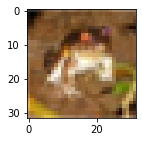

In [9]:
images(x_train, 0)

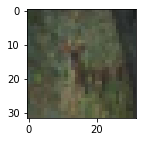

In [11]:
images(x_train, 10)

## Normalising the data

In [12]:
x_train = x_train / 255
x_test = x_test / 255

## Building CNN model

In [15]:
cnn = models.Sequential()

### First convolutional layer

In [17]:
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))

### First pooling layer 

In [18]:
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2))

### Second convolutional and pooling layer

In [19]:
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
cnn.add(layers.MaxPool2D(pool_size = 2, strides = 2))

### Flattened Layer 

In [21]:
cnn.add(layers.Flatten())

### Full connected layer or hidden layer

In [22]:
cnn.add(layers.Dense(64, activation='relu'))

### Output layer

In [25]:
cnn.add(layers.Dense(10, activation='softmax'))

## Training the CNN

In [ ]:
cnn.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 45ms/step - loss: 1.4676 - accuracy: 0.4729
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1255 - accuracy: 0.6041
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0135 - accuracy: 0.6449
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9367 - accuracy: 0.6749
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8806 - accuracy: 0.6920
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8283 - accuracy: 0.7097
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7832 - accuracy: 0.7251
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7474 - accuracy: 0.7392
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7131 - accuracy: 0.7500
Epoch 10/10
1563/1563 [==============================] - 72s 46m

## Result (loss and Accuracy)

In [30]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9208 - accuracy: 0.6820


[0.9207691550254822, 0.6819999814033508]